### Student Information
Name: 趙苡棋 (Yichi Chao)

Student ID: 109070024

GitHub ID: YiChiChao

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

In [19]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [20]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [21]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [22]:
X

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...
...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...


In [23]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [24]:
# a simple query
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### 1. Take Home Exercise in DM2022-Lab1-Master

#### Exercise2
#### Selection by Position


In [25]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [26]:
X[:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [27]:
X[:10:2]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med


In [28]:
#Backwards
X[:2250:-1]

,text,category,category_name
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med


#### Pass a list of columns to `[] `to select columns in that order.

In [29]:
X[['text', 'category']] = X[['category', 'text']]

In [30]:
X

,text,category,category_name
0,1,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,3,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,3,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
...,...,...,...
2252,2,From: roos@Operoni.Helsinki.FI (Christophe Roo...,sci.med
2253,2,From: mhollowa@ic.sunysb.edu (Michael Holloway...,sci.med
2254,2,From: sasghm@theseus.unx.sas.com (Gary Merrill...,sci.med
2255,2,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,sci.med


In [31]:
X[['text', 'category']] = X[['category', 'text']]

In [32]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


---

#### Selection by Label

In [33]:
Y = pd.DataFrame.from_records(dmh.format_rows(twenty_train), 
                   columns=['text'], index = pd.date_range('1/1/2000', periods=2257))


In [34]:
#select the row from '2000-02-25' to the end
Y.loc['2000-02-25':]

,text
2000-02-25,From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...
2000-02-26,From: kaminski@netcom.com (Peter Kaminski) Sub...
2000-02-27,From: mauaf@csv.warwick.ac.uk (Mr P D Simmons)...
2000-02-28,From: timmbake@mcl.ucsb.edu (Bake Timmons) Sub...
2000-02-29,From: joachim@kih.no (joachim lous) Subject: R...
...,...
2006-03-02,From: roos@Operoni.Helsinki.FI (Christophe Roo...
2006-03-03,From: mhollowa@ic.sunysb.edu (Michael Holloway...
2006-03-04,From: sasghm@theseus.unx.sas.com (Gary Merrill...
2006-03-05,From: Dan Wallach <dwallach@cs.berkeley.edu> S...


In [35]:
#select the row '2000-02-25' and '2000-03-27' (Add one more bracket inside)
Y.loc[['2000-02-25', '2000-03-27']]

,text
2000-02-25,From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...
2000-03-27,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...


#### Selection by Callable

In [36]:
Z = pd.DataFrame.from_records(dmh.format_rows(twenty_train), 
                   columns=['text'])
# add category to the dataframe
Z['category'] = twenty_train.target
# add category label also
Z['category_name'] = Z.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [37]:
##index can be a callable
Z.loc[lambda date: date['category'] > 2 , :]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


#### Combining positional and label-based indexing

In [38]:
##The row from 0 to 2
Z.loc[0:2, ['text', 'category_name']]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian


In [39]:
##The row 0 and 2
Z.loc[[0,2], ['text', 'category_name']]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian


####  Exercise 5 

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡  : why .isnull() didn't work?

In [40]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [41]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Ans: From my observation, the rows which can be identified by the function `.isnull()` has the regular format of expressing NaN. For example: `np.nan`, `None` or not even input any information. However, in reality we cannot expect how the dataset creator to inputing their data. 
    To efficiently find those missing values, such as inputting the NaN or None as a string type, or even typing a space. We can first know the type of the column, and filter the NaN data by checking the data type in each input.
    If the column type is string, we can first create a list of "possible NaN inputs" to efficiently find out the hidden missing data.
    

In [42]:
# Import Regular Expressions lib
import re
# Using regex to find the NA values
# first separate the NaN data and other datas
NA_df.missing_example.apply(lambda x: len(re.findall('NaN|[x|?|!|#|-|]|None|', x)) !=0 if pd.notnull(x) else True)

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### Example 6

In [43]:
X[:100]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
95,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
96,From: orourke@sophia.smith.edu (Joseph O'Rourk...,1,comp.graphics
97,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
98,From: jmuller@ic.sunysb.edu (John S Muller) Su...,1,comp.graphics


In [44]:
X_sample = X.sample(n=1000) #random state

In [45]:
len(X_sample)

1000

In [46]:
X_sample[:15]

,text,category,category_name
531,From: ch381@cleveland.Freenet.Edu (James K. Bl...,1,comp.graphics
1336,From: Donald Mackie <Donald_Mackie@med.umich.e...,2,sci.med
955,From: MNHCC@cunyvm.bitnet (Marty Helgesen) Sub...,3,soc.religion.christian
1793,From: rbutera@owlnet.rice.edu (Robert John But...,3,soc.religion.christian
321,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
658,From: mussack@austin.ibm.com (Christopher Muss...,3,soc.religion.christian
1458,From: jbulf@balsa.Berkeley.EDU (Jeff Bulf) Sub...,1,comp.graphics
1411,From: mathew <mathew@mantis.co.uk> Subject: Al...,0,alt.atheism
1644,From: beck@irzr17.inf.tu-dresden.de (Andre Bec...,1,comp.graphics
2031,"From: haston@utkvx.utk.edu (Haston, Donald Way...",1,comp.graphics


Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [47]:
len(X)

2257

In [48]:
X[:277]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
272,From: rayssd!esther@uunet.uu.net (Esther A. Pa...,3,soc.religion.christian
273,From: bcash@crchh410.NoSubdomain.NoDomain (Bri...,0,alt.atheism
274,From: neal@cmptrc.lonestar.org (Neal Howard) S...,2,sci.med
275,From: dozonoff@bu.edu (david ozonoff) Subject:...,2,sci.med


#### Exercise 8


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [51]:
# Create two dataset
A = X[:1000]
B = X[1000:2000]


soc.religion.christian    273
sci.med                   273
comp.graphics             250
alt.atheism               204
Name: category_name, dtype: int64


comp.graphics             264
soc.religion.christian    264
sci.med                   262
alt.atheism               210
Name: category_name, dtype: int64


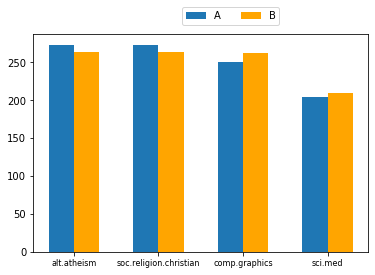

In [52]:
print(A.category_name.value_counts())
print("\n")
print(B.category_name.value_counts())
bar = np.arange(len(categories))
width = 0.3
plt.bar(bar, A.category_name.value_counts(), width,  label='A')
plt.bar(bar+width, B.category_name.value_counts(), width, color='orange', label='B')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.xticks(bar + width / 2, categories)
plt.xticks(fontsize = 8) 
plt.show()

In [53]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [54]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [56]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

# We can check the shape of this matrix by:
X_counts.shape

In [58]:
conda update conda

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [59]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.5.
The scikit-learn version is 0.23.2.


In [60]:
count_vect.get_feature_names_out()[0:10]

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

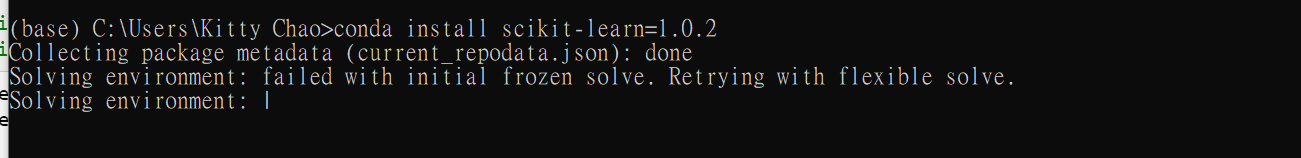


In [ ]:
X_counts[0:5, 0:100].toarray()